In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ConvNeXtBase, ConvNeXtXLarge
from tensorflow.keras.layers import GlobalAveragePooling2D

In [51]:
# train_dir = '/Users/davemag9/Desktop/Diploma/archive1/Indian Food Images/Indian Food Images'

train_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/train_set'
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if
                  os.path.isdir(os.path.join(train_dir, d))]
subdirectories

['/Users/davemag9/Desktop/Diploma/food20dataset/train_set/vada pav',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/idly',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/bisibelebath',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/ice_cream',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/samosa',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/paniyaram',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/chicken_curry',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/cheesecake',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/meduvadai',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/ven pongal',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/hot_dog',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/dhokla',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/apple_pie',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/chaat',
 '/Users/davemag9/Desktop/Dip

In [52]:
categories = sorted(os.listdir(train_dir))
categories = [category for category in categories if category != '.DS_Store']

categories

['apple_pie',
 'biriyani',
 'bisibelebath',
 'butternaan',
 'chaat',
 'chappati',
 'cheesecake',
 'chicken_curry',
 'dhokla',
 'dosa',
 'french_fries',
 'fried_rice',
 'gulab jamun',
 'halwa',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'idly',
 'kathi roll',
 'meduvadai',
 'noodles',
 'omelette',
 'paniyaram',
 'pizza',
 'poori',
 'samosa',
 'sushi',
 'tandoori chicken',
 'upma',
 'vada pav',
 'ven pongal']

In [53]:
df = pd.DataFrame(columns=['image_path', 'label'])
df.head()

,image_path,label


In [54]:
dfs = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [55]:
dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
        count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [56]:
df = pd.concat(dfs, ignore_index=True)
df

,image_path,label
0,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
1,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
2,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
3,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
4,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
...,...,...
2177,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2178,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2179,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2180,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal


In [57]:
# df[df['label'] == "apple_pie"].value_counts()



In [58]:
# hui = df[df['label'] == "apple_pie"].value_counts()

In [59]:
# for penis in hui:
#     print(penis)

/var/folders/2z/bd17dm2577gbxxvhvfvsj2lw0000gn/T/ipykernel_42300/3655467222.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='label', y='count', palette='viridis')


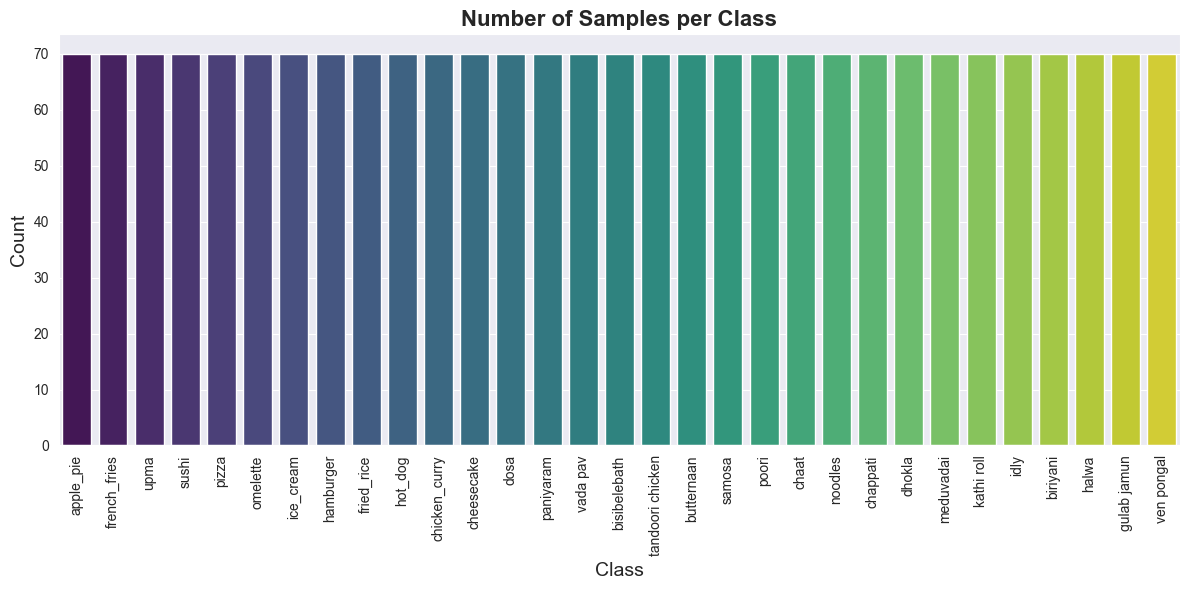

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count and cap values > 70
label_counts = df['label'].value_counts()
label_counts_capped = label_counts.clip(upper=70)

# Create DataFrame for plotting
plot_df = label_counts_capped.reset_index()
plot_df.columns = ['label', 'count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='label', y='count', palette='viridis')
plt.title('Number of Samples per Class', fontsize=16, weight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [61]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [62]:
train_df.shape

(1745, 2)

In [63]:
val_df.shape

(437, 2)

In [64]:
# val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42, shuffle=True)

In [65]:
val_df.shape

(437, 2)

In [64]:
# test_df.shape

In [66]:
augmentation_params = {
    'rotation_range': 20,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.2,
    'zoom_range': 0.1,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}
img_size = (224, 224)
batch_size = 32

In [67]:
train_datagen = ImageDataGenerator(
    # rescale=1. / 255,
    # **augmentation_params
)
val_datagen = ImageDataGenerator(
    # rescale=1. / 255
)
# test_datagen = ImageDataGenerator(
#     rescale=1. / 255
# )

In [68]:
train_images = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=True,
    seed=42,
    class_mode='categorical'
)

Found 1736 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


/var/folders/2z/bd17dm2577gbxxvhvfvsj2lw0000gn/T/ipykernel_56733/1695645890.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='label', y='count', palette='viridis')


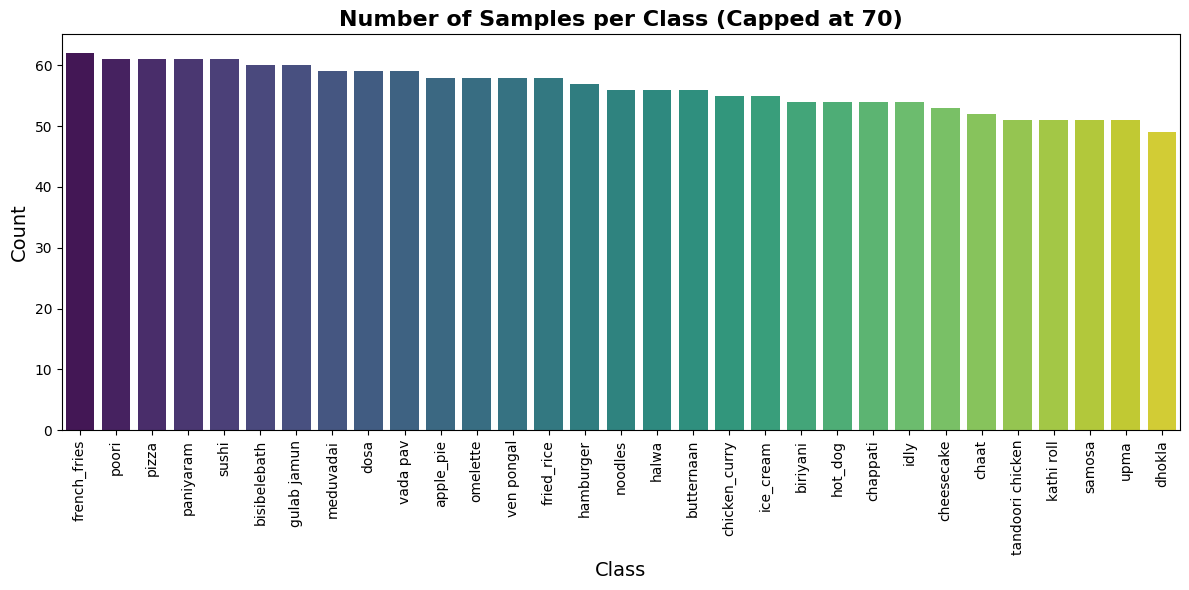

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the number of samples per class
label_counts = train_df['label'].value_counts()

# Cap values > 70
label_counts_capped = label_counts.clip(upper=70)

# Create DataFrame for plotting
plot_df = label_counts_capped.reset_index()
plot_df.columns = ['label', 'count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='label', y='count', palette='viridis')
plt.title('Number of Samples per Class', fontsize=16, weight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [69]:
val_images = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 434 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [16]:
# test_images = test_datagen.flow_from_dataframe(
#     test_df,
#     x_col='image_path',
#     y_col='label',
#
#     target_size=img_size,
#     batch_size=batch_size,
#
#     shuffle=False,
#     seed=42,
#     class_mode='categorical'
# )

In [70]:
from tensorflow.keras.models import load_model

# Load the model
model_en = load_model('/Users/davemag9/Desktop/Diploma/model_en22.h5')

# Summary of the model
# model.summary()


In [71]:
predictions = model_en.predict(train_images)
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes[:80]

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 51s 905ms/step


array([23,  8, 27, 11, 20, 17, 21, 29, 13,  0, 11, 10, 22, 25, 23, 10, 14,
        3, 10, 30, 10,  0, 17, 12, 29, 22, 29, 17, 10, 13,  2, 14, 15,  8,
        4,  5, 11,  1,  5,  9, 17, 30, 28, 26, 14, 14, 26,  4, 19, 11, 23,
        6, 22,  4,  5,  0, 17,  2,  3,  5,  6, 22, 21, 29, 15, 23,  9, 10,
       26,  1, 12,  2, 10, 11, 12, 19,  4,  3, 13, 10])

In [72]:
class_labels = list(train_images.class_indices.keys())
report = classification_report(train_images.classes, predicted_classes, target_names=class_labels)

print(report)

                  precision    recall  f1-score   support

       apple_pie       0.03      0.04      0.03        57
        biriyani       0.02      0.02      0.02        54
    bisibelebath       0.03      0.03      0.03        60
      butternaan       0.05      0.05      0.05        56
           chaat       0.02      0.02      0.02        52
        chappati       0.04      0.04      0.04        54
      cheesecake       0.06      0.06      0.06        53
   chicken_curry       0.04      0.04      0.04        54
          dhokla       0.00      0.00      0.00        49
            dosa       0.05      0.05      0.05        59
    french_fries       0.07      0.07      0.07        61
      fried_rice       0.06      0.07      0.07        57
     gulab jamun       0.05      0.05      0.05        60
           halwa       0.05      0.05      0.05        56
       hamburger       0.03      0.04      0.03        57
         hot_dog       0.00      0.00      0.00        54
       ice_cr

In [70]:
pretrained_model = EfficientNetB0(
    input_shape=(img_size[0], img_size[1], 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

outputs = Dense(len(categories), activation='softmax')(pretrained_model.output)

model_en = Model(pretrained_model.input, outputs, name='EfficientNetB0')

# print(model_en.summary())

In [71]:
model_en.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [72]:
history_mn = model_en.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2196 - loss: 3.0508 - val_accuracy: 0.6759 - val_loss: 1.7974
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7153 - loss: 1.6085 - val_accuracy: 0.7724 - val_loss: 1.1938
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7740 - loss: 1.1411 - val_accuracy: 0.7770 - val_loss: 0.9753
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.8348 - loss: 0.8560 - val_accuracy: 0.7816 - val_loss: 0.8648
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8503 - loss: 0.7185 - val_accuracy: 0.7931 - val_loss: 0.7836
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8916 - loss: 0.6127 - val_accuracy: 0.8046 - val_loss: 0.7392
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8957 - loss: 0.5314 - val_accuracy: 0.8138 - val_loss: 0.7061
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9105 - loss: 0.4576 - val_accuracy: 0.8138 - val_loss:

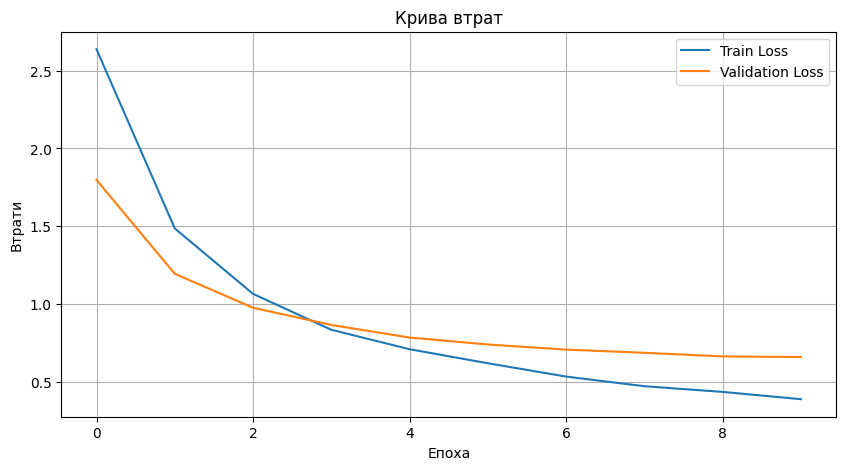

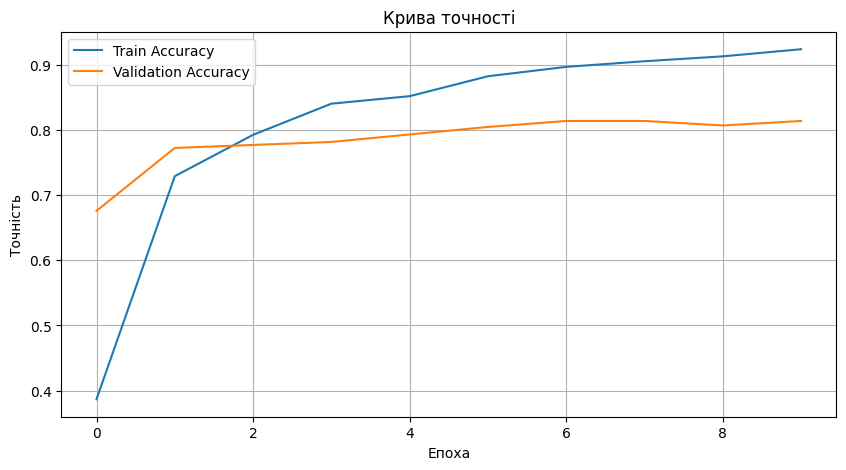

In [73]:
import matplotlib.pyplot as plt

# --- Побудова графіку втрат ---
plt.figure(figsize=(10, 5))
plt.plot(history_mn.history['loss'], label='Train Loss')
plt.plot(history_mn.history['val_loss'], label='Validation Loss')
plt.title('Крива втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)
plt.show()

# --- Побудова графіку точності ---
plt.figure(figsize=(10, 5))
plt.plot(history_mn.history['accuracy'], label='Train Accuracy')
plt.plot(history_mn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Крива точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
test_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/test_set'
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(test_dir) if
                  os.path.isdir(os.path.join(test_dir, d))]

categories = sorted(os.listdir(test_dir))
categories = [category for category in categories if category != '.DS_Store']


df = pd.DataFrame(columns=['image_path', 'label'])

dfs = []

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)


dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
        count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

test_df = pd.concat(dfs, ignore_index=True)


test_datagen = ImageDataGenerator(
    # rescale=1. / 255
)

test_images = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)


Found 930 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [27]:
predictions = model_en.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes[:80]

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step


array([ 0,  0,  0,  0,  0, 16,  0,  0, 28, 21,  0,  0,  0,  0,  0,  0,  0,
       25,  7,  0,  0,  0,  0,  3,  3,  0,  9,  0,  7,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  9,  1,  1, 11,  1,  1,  1, 27,  1,  1,  1,  8,
        1,  1, 11, 20,  4,  1,  1,  1,  1,  2, 13,  2, 30,  2,  2,  2, 28,
       13,  2,  2, 13, 30,  2,  2,  2,  2, 13, 11,  2])

In [29]:
true_classes = test_images.classes
class_labels = list(val_images.class_indices.keys())
num_images = 25
count = 0

while count < num_images:
    print(f"{count + 1}. Label: {true_classes[count]}, Prediction: {predicted_classes[count]}")
    count += 1

1. Label: 0, Prediction: 0
2. Label: 0, Prediction: 0
3. Label: 0, Prediction: 0
4. Label: 0, Prediction: 0
5. Label: 0, Prediction: 0
6. Label: 0, Prediction: 16
7. Label: 0, Prediction: 0
8. Label: 0, Prediction: 0
9. Label: 0, Prediction: 28
10. Label: 0, Prediction: 21
11. Label: 0, Prediction: 0
12. Label: 0, Prediction: 0
13. Label: 0, Prediction: 0
14. Label: 0, Prediction: 0
15. Label: 0, Prediction: 0
16. Label: 0, Prediction: 0
17. Label: 0, Prediction: 0
18. Label: 0, Prediction: 25
19. Label: 0, Prediction: 7
20. Label: 0, Prediction: 0
21. Label: 0, Prediction: 0
22. Label: 0, Prediction: 0
23. Label: 0, Prediction: 0
24. Label: 0, Prediction: 3
25. Label: 0, Prediction: 3


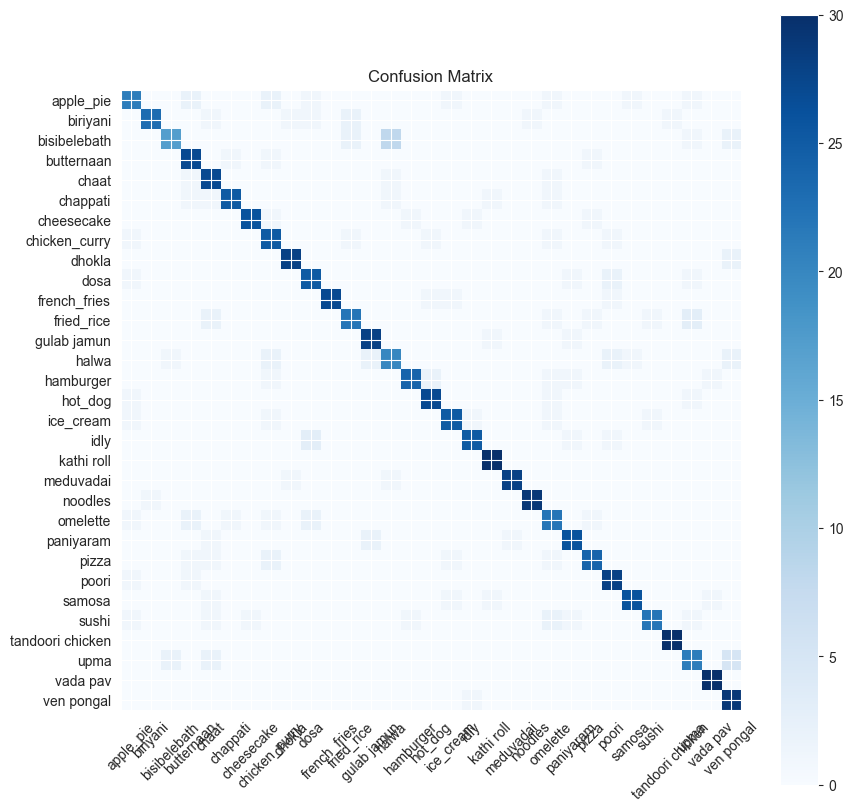

In [32]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.show()

In [132]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

                  precision    recall  f1-score   support

       apple_pie       0.75      0.70      0.72        30
        biriyani       0.96      0.77      0.85        30
    bisibelebath       0.85      0.57      0.68        30
      butternaan       0.77      0.90      0.83        30
           chaat       0.73      0.90      0.81        30
        chappati       0.93      0.83      0.88        30
      cheesecake       0.96      0.87      0.91        30
   chicken_curry       0.69      0.83      0.76        30
          dhokla       0.93      0.93      0.93        30
            dosa       0.78      0.83      0.81        30
    french_fries       1.00      0.90      0.95        30
      fried_rice       0.81      0.73      0.77        30
     gulab jamun       0.88      0.93      0.90        30
           halwa       0.65      0.67      0.66        30
       hamburger       0.92      0.80      0.86        30
         hot_dog       0.87      0.90      0.89        30
       ice_cr

In [133]:
model_en.save('./model_en22.h5')

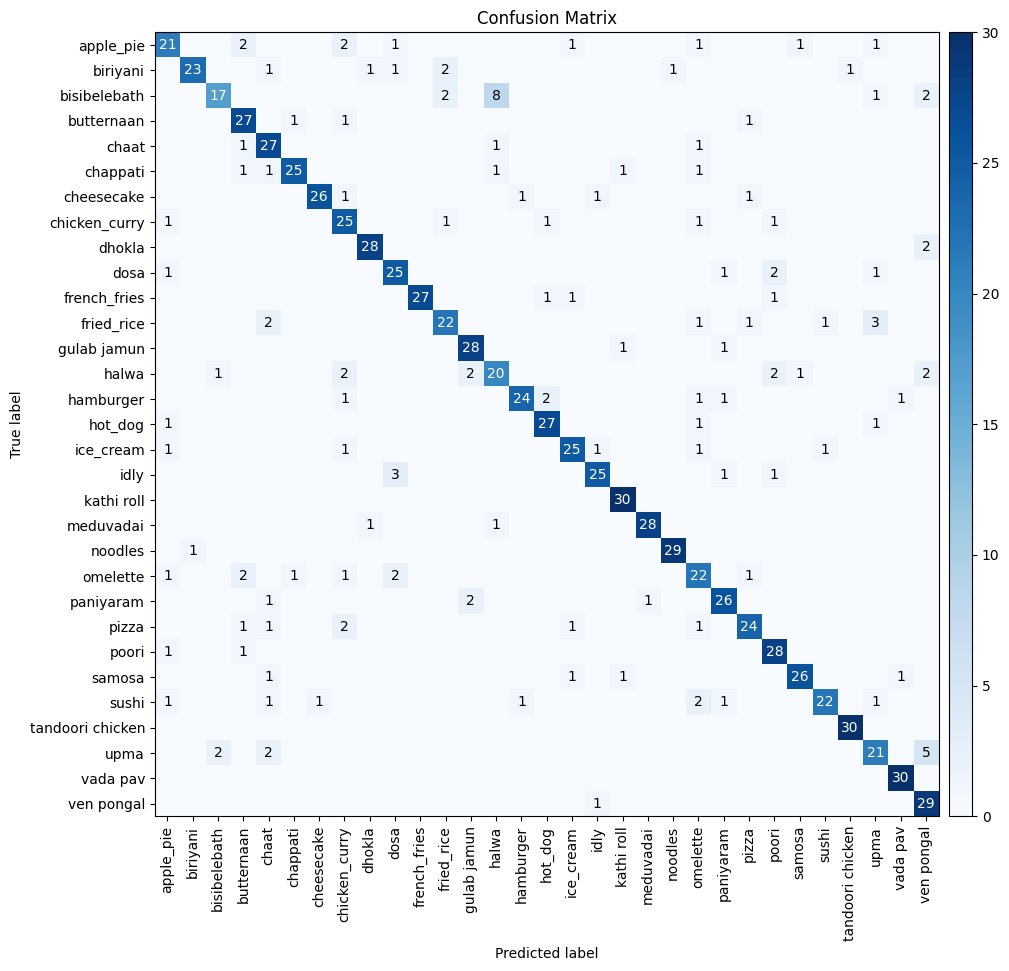

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Припускаємо, що у тебе вже є:
# true_classes = [...]
# predicted_classes = [...]
# class_labels = [...]

cm = confusion_matrix(true_classes, predicted_classes)

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')

tick_marks = np.arange(len(class_labels))
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels)

# Підпис значень у клітинках, крім 0
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

# Зменшення ширини colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)  # size визначає ширину
plt.colorbar(im, cax=cax)

fig.tight_layout()
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()


In [138]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Predict probabilities
y_scores = model_en.predict(test_images)  # shape: (n_samples, n_classes)

# Get true labels
y_true = test_images.labels  # or however your test labels are stored

# Binarize labels for multi-class (1-vs-rest)
y_true_bin = label_binarize(y_true, classes=range(y_scores.shape[1]))


30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 915ms/step


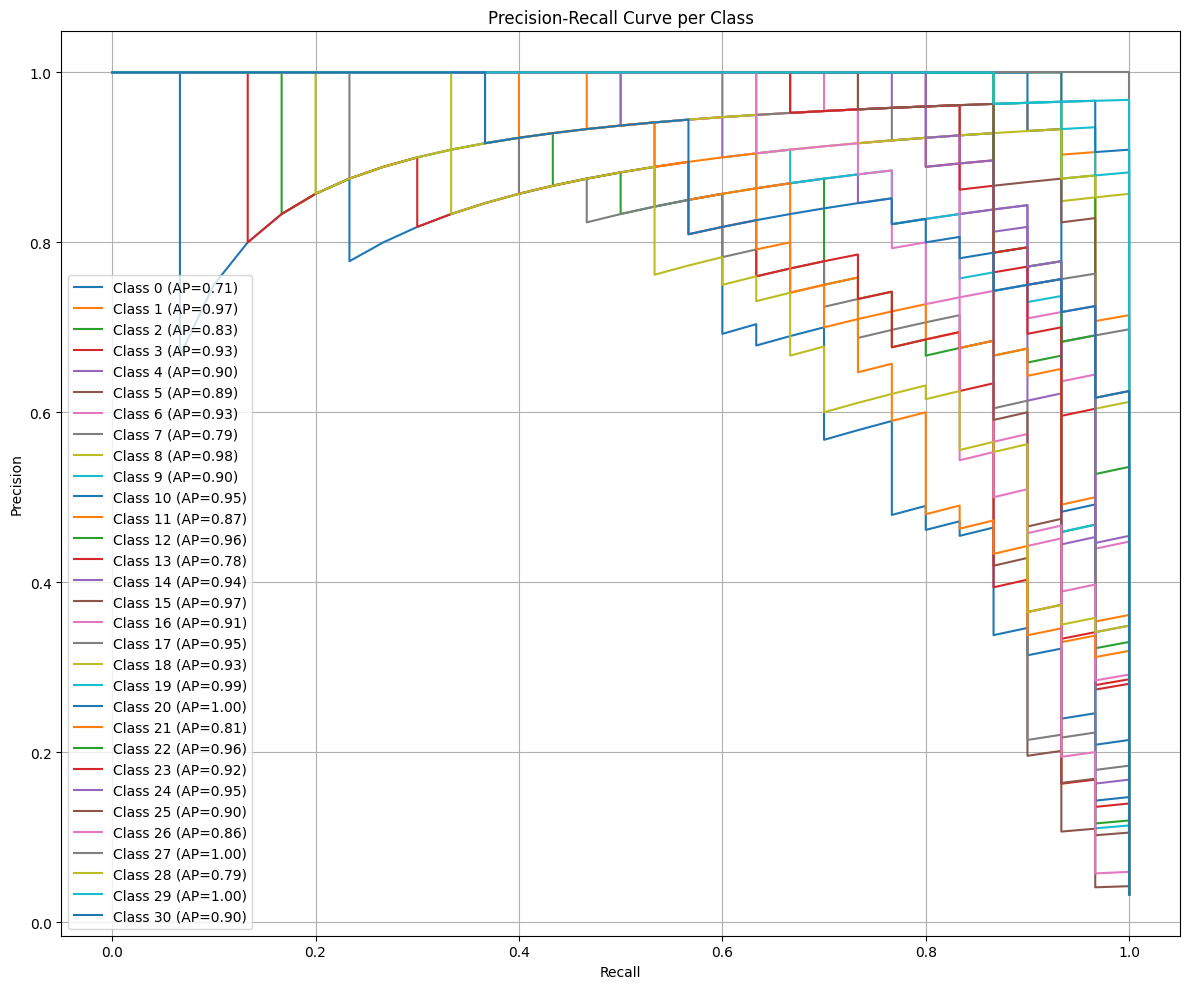

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

plt.figure(figsize=(12, 10))

for i in range(y_scores.shape[1]):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_scores[:, i])
    ap = average_precision_score(y_true_bin[:, i], y_scores[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP={ap:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve per Class")
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.cm as cm

# Predict probabilities for test set
y_scores = model_en.predict(test_images)
y_true = test_images.labels

# Binarize true labels
n_classes = y_scores.shape[1]
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# Create color map
colors = cm.get_cmap('tab20', n_classes)

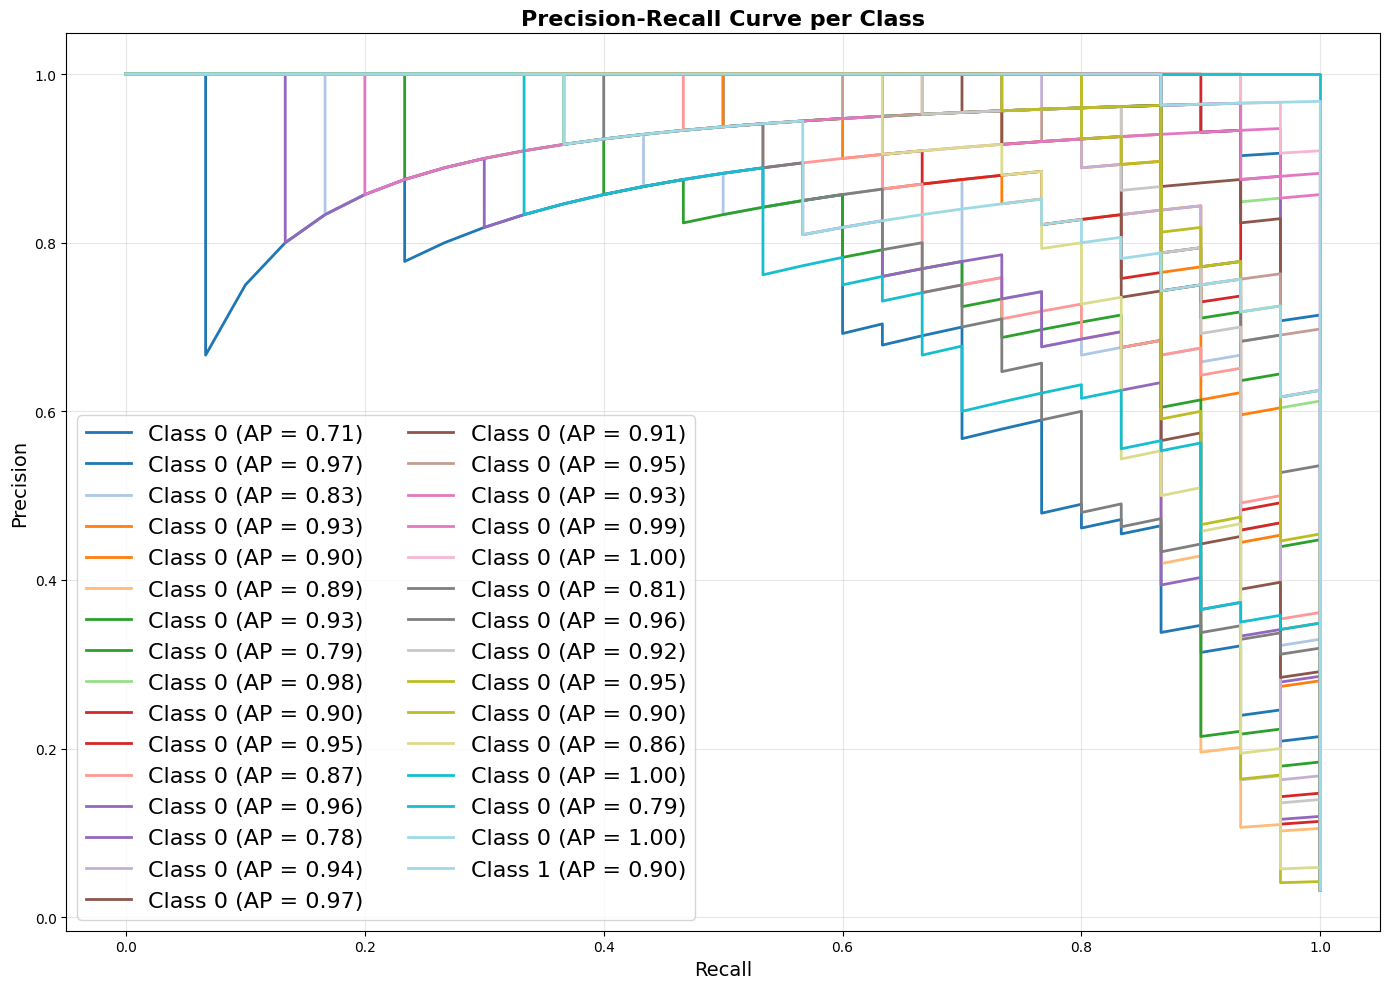

In [ ]:
plt.figure(figsize=(14, 10))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_scores[:, i])
    ap = average_precision_score(y_true_bin[:, i], y_scores[:, i])
    
    plt.plot(recall, precision, color=colors(i), lw=2,
             label=f'Class {i} (AP = {ap:.2f})')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve per Class', fontsize=16, weight='bold')
plt.legend(loc='lower left', fontsize=16, ncol=2, frameon=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


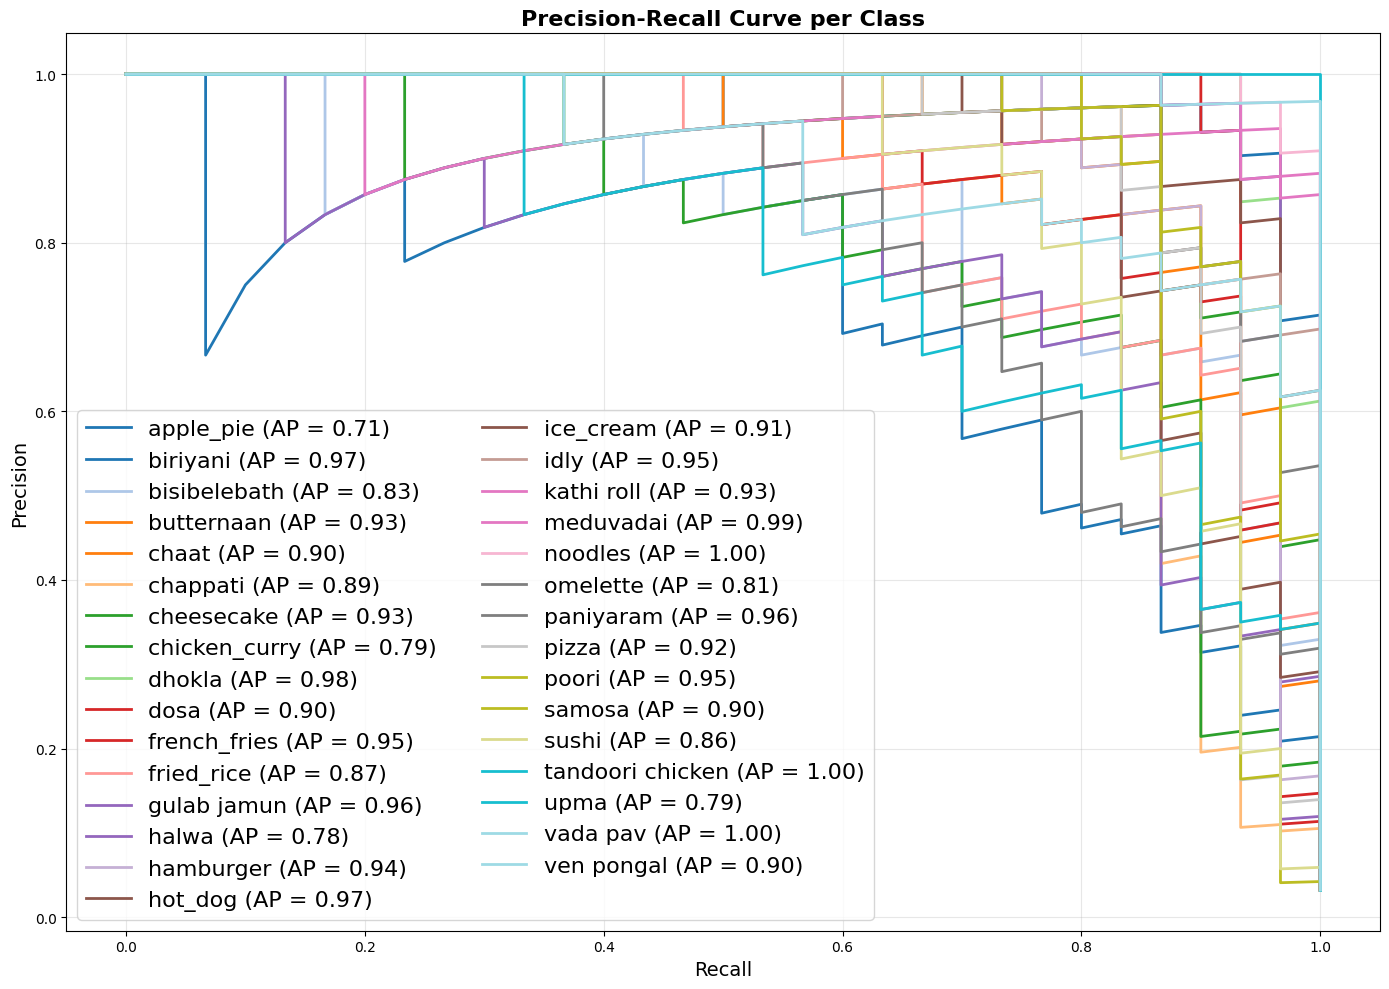

In [144]:
plt.figure(figsize=(14, 10))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_scores[:, i])
    ap = average_precision_score(y_true_bin[:, i], y_scores[:, i])
    
    plt.plot(recall, precision, color=colors(i), lw=2,
             label=f'{class_labels[i]} (AP = {ap:.2f})')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve per Class', fontsize=16, weight='bold')
plt.legend(loc='lower left', fontsize=16, ncol=2, frameon=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [215]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing import image

# Отримуємо потрібні дані
predictions = model_en.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_images.classes
class_labels = list(test_images.class_indices.keys())
image_paths = test_images.filepaths

# Індекси неправильних передбачень
wrong_indices = np.where(predicted_classes != true_classes)[0]

# Перевірка
if len(wrong_indices) == 0:
    print("No incorrect predictions to display.")
else:
    num_pairs = min(5, len(wrong_indices))
    plt.figure(figsize=(10, 4 * num_pairs))

    shown = 0
    for i in wrong_indices:
        if shown >= num_pairs:
            break

        true_label = true_classes[i]
        pred_label = predicted_classes[i]

        # Помилкове зображення
        wrong_img = image.load_img(image_paths[i], target_size=(224, 224))
        wrong_img = np.array(wrong_img)

        # Приклад правильного класу
        correct_indices = np.where(true_classes == true_label)[0]
        correct_indices = [j for j in correct_indices if j != i]

        if not correct_indices:
            continue

        ref_idx = random.choice(correct_indices)
        correct_img = image.load_img(image_paths[ref_idx], target_size=(224, 224))
        correct_img = np.array(correct_img)

        # Побудова графіків
        plt.subplot(num_pairs, 2, shown * 2 + 1)
        plt.imshow(wrong_img)
        plt.axis('off')
        plt.title(f"❌ Pred: {class_labels[pred_label]}\n✅ True: {class_labels[true_label]}")

        plt.subplot(num_pairs, 2, shown * 2 + 2)
        plt.imshow(correct_img)
        plt.axis('off')
        plt.title(f"✅ Sample of: {class_labels[true_label]}")

        shown += 1

    plt.tight_layout()
    plt.show()


30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 722ms/step


/var/folders/2z/bd17dm2577gbxxvhvfvsj2lw0000gn/T/ipykernel_56733/767324560.py:36: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  correct_indices = np.where(true_classes == true_label)[0]


<Figure size 1000x2000 with 0 Axes>

In [216]:
import pandas as pd
import numpy as np

# Передбачення та справжні класи
predicted_classes = np.argmax(model_en.predict(test_images), axis=1)
true_classes = test_images.classes
class_labels = list(test_images.class_indices.keys())
image_paths = test_images.filepaths

# Індекси помилкових передбачень
wrong_indices = np.where(predicted_classes != true_classes)[0]

# Список для збереження даних
data = []

for idx in wrong_indices:
    img_path = image_paths[idx]
    true_label = class_labels[true_classes[idx]]
    pred_label = class_labels[predicted_classes[idx]]
    
    data.append({
        'image_path': img_path,
        'prediction (wrong)': pred_label,
        'true_label': true_label
    })

# Створення DataFrame
df_failed_preds = pd.DataFrame(data)

# Показати перші 10 рядків
df_failed_preds.head(10)


30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 813ms/step


,image_path,prediction (wrong),true_label
0,/Users/davemag9/Desktop/Diploma/food20dataset/...,ice_cream,apple_pie
1,/Users/davemag9/Desktop/Diploma/food20dataset/...,upma,apple_pie
2,/Users/davemag9/Desktop/Diploma/food20dataset/...,omelette,apple_pie
3,/Users/davemag9/Desktop/Diploma/food20dataset/...,samosa,apple_pie
4,/Users/davemag9/Desktop/Diploma/food20dataset/...,chicken_curry,apple_pie
5,/Users/davemag9/Desktop/Diploma/food20dataset/...,butternaan,apple_pie
6,/Users/davemag9/Desktop/Diploma/food20dataset/...,butternaan,apple_pie
7,/Users/davemag9/Desktop/Diploma/food20dataset/...,dosa,apple_pie
8,/Users/davemag9/Desktop/Diploma/food20dataset/...,chicken_curry,apple_pie
9,/Users/davemag9/Desktop/Diploma/food20dataset/...,dosa,biriyani


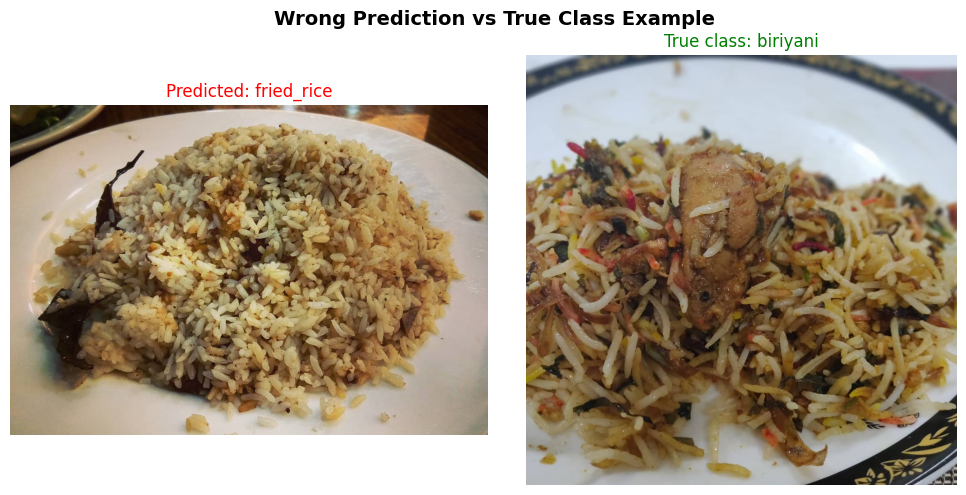

In [220]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Витяг перших невірного передбачення
wrong_row = df_failed_preds.iloc[10]

wrong_img_path = wrong_row['image_path']
wrong_pred_label = wrong_row['prediction (wrong)']
true_label = wrong_row['true_label']

# Пошук будь-якого зображення з правильним класом
true_class_images = df[df['label'] == true_label]['image_path'].tolist()
true_example_path = random.choice(true_class_images) if true_class_images else None

# Побудова графіку
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 1. Невірно класифіковане зображення
img_wrong = mpimg.imread(wrong_img_path)
axs[0].imshow(img_wrong)
axs[0].axis('off')
axs[0].set_title(f'Predicted: {wrong_pred_label}', fontsize=12, color='red')

# 2. Зображення правильного класу
if true_example_path and os.path.exists(true_example_path):
    img_true = mpimg.imread(true_example_path)
    axs[1].imshow(img_true)
    axs[1].axis('off')
    axs[1].set_title(f'True class: {true_label}', fontsize=12, color='green')
else:
    axs[1].set_visible(False)

plt.suptitle('Wrong Prediction vs True Class Example', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [221]:
import pandas as pd
import numpy as np

# Передбачення та справжні класи
predicted_classes = np.argmax(model_en.predict(test_images), axis=1)
true_classes = test_images.classes
class_labels = list(test_images.class_indices.keys())
image_paths = test_images.filepaths

# Індекси помилкових передбачень
wrong_indices = np.where(predicted_classes == true_classes)[0]

# Список для збереження даних
data = []

for idx in wrong_indices:
    img_path = image_paths[idx]
    true_label = class_labels[true_classes[idx]]
    pred_label = class_labels[predicted_classes[idx]]
    
    data.append({
        'image_path': img_path,
        'prediction (wrong)': pred_label,
        'true_label': true_label
    })

# Створення DataFrame
df_unfailed_preds = pd.DataFrame(data)

# Показати перші 10 рядків
df_unfailed_preds.head(10)


30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 912ms/step


,image_path,prediction (wrong),true_label
0,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
1,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
2,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
3,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
4,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
5,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
6,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
7,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
8,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie
9,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie,apple_pie


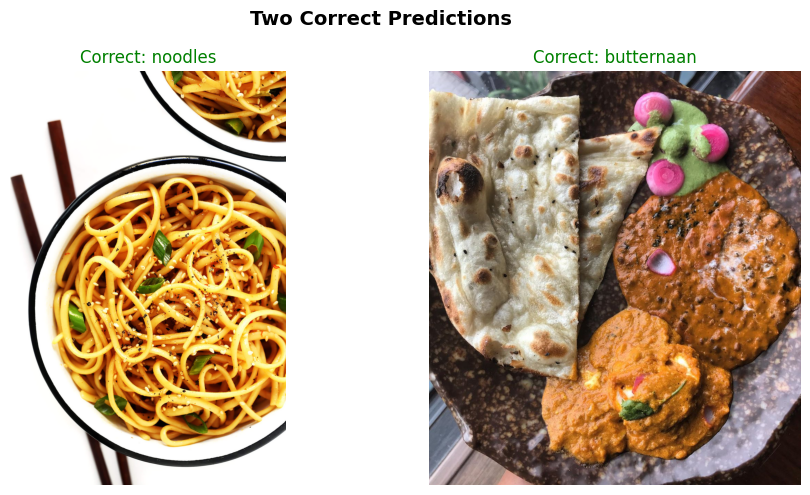

In [224]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Select two rows from correct predictions
row1 = df_unfailed_preds.iloc[500]
row2 = df_unfailed_preds.iloc[70]

img_path1 = row1['image_path']
img_path2 = row2['image_path']
label1 = row1['true_label']
label2 = row2['true_label']

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First correct prediction
img1 = mpimg.imread(img_path1)
axs[0].imshow(img1)
axs[0].axis('off')
axs[0].set_title(f'Correct: {label1}', fontsize=12, color='green')

# Second correct prediction
img2 = mpimg.imread(img_path2)
axs[1].imshow(img2)
axs[1].axis('off')
axs[1].set_title(f'Correct: {label2}', fontsize=12, color='green')

plt.suptitle('Two Correct Predictions', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
